# <a name="0">Hierarchical Clustering</a>

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
4. <a href="#5">Training datasets</a>
5. <a href="#6">Improvement ideas</a>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings  
import seaborn as sns
from scipy import stats
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/fernandol/countries-of-the-world
then import it in python.

In [2]:
#read the data

data_path = 'E:\\Ai trainning\\phase2\\ml2\\hirerical\\countries of the world.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)


The shape of the dataset is: (227, 20)


In [3]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [4]:
df['Pop. Density (per sq. mi.)']

0       48,0
1      124,6
2       13,8
3      290,4
4      152,1
       ...  
222    419,9
223      1,0
224     40,6
225     15,3
226     31,3
Name: Pop. Density (per sq. mi.), Length: 227, dtype: object

## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [5]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null object
Coastline (coast/area ratio)          227 non-null object
Net migration                         224 non-null object
Infant mortality (per 1000 births)    224 non-null object
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null object
Phones (per 1000)                     223 non-null object
Arable (%)                            225 non-null object
Crops (%)                             225 non-null object
Other (%)                             225 non-null object
Climate                               205 non-null object
Birthrate                 

In [6]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

Country                               0.00
Region                                0.00
Population                            0.00
Area (sq. mi.)                        0.00
Pop. Density (per sq. mi.)            0.00
Coastline (coast/area ratio)          0.00
Net migration                         1.32
Infant mortality (per 1000 births)    1.32
GDP ($ per capita)                    0.44
Literacy (%)                          7.93
Phones (per 1000)                     1.76
Arable (%)                            0.88
Crops (%)                             0.88
Other (%)                             0.88
Climate                               9.69
Birthrate                             1.32
Deathrate                             1.76
Agriculture                           6.61
Industry                              7.05
Service                               6.61
dtype: float64

In [7]:
# Get names of columns with missing values
cols_with_missing = [col for col in df.columns
                     if df[col].isnull().any()]

cols_with_missing#Drop nulls


['Net migration',
 'Infant mortality (per 1000 births)',
 'GDP ($ per capita)',
 'Literacy (%)',
 'Phones (per 1000)',
 'Arable (%)',
 'Crops (%)',
 'Other (%)',
 'Climate',
 'Birthrate',
 'Deathrate',
 'Agriculture',
 'Industry',
 'Service']

In [8]:
# Count duplicates in all dataframe
print(df.duplicated().sum())

0


In [9]:
# This will print basic statistics for numerical columns
df.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


In [10]:
df.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)             object
Coastline (coast/area ratio)           object
Net migration                          object
Infant mortality (per 1000 births)     object
GDP ($ per capita)                    float64
Literacy (%)                           object
Phones (per 1000)                      object
Arable (%)                             object
Crops (%)                              object
Other (%)                              object
Climate                                object
Birthrate                              object
Deathrate                              object
Agriculture                            object
Industry                               object
Service                                object
dtype: object

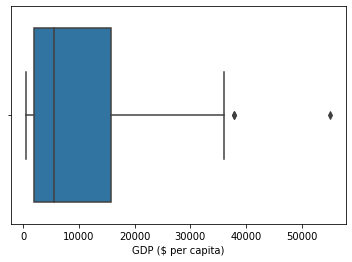

In [11]:
sns.boxplot(x=df['GDP ($ per capita)'])

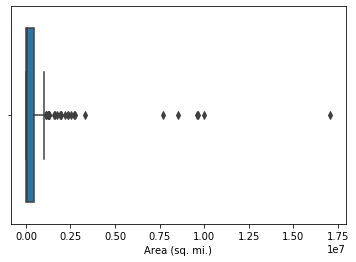

In [12]:
sns.boxplot(x=df['Area (sq. mi.)'])

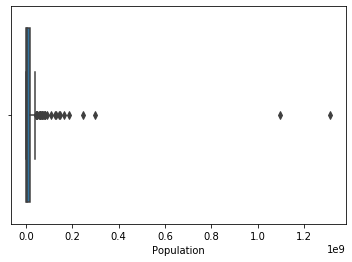

In [13]:

sns.boxplot(x=df['Population'])


## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1- nulls          <br>
2- outliers <br>
3- datatypes

In [14]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue**

In [15]:
#solution 
#I will drop nulls

In [16]:
#test 
#Drop nulls
df_copy.dropna(inplace=True)
df_copy.isnull().sum()


Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

**Second issue**

In [17]:
#solution 
#remove outliers by Interquartile Range(IQR)

In [18]:
#test 
Q1 = df_copy.quantile(0.25)
Q3 = df_copy.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Population            19671554.5
Area (sq. mi.)          476526.0
GDP ($ per capita)       11150.0
dtype: float64


In [19]:
df_copy = df_copy[~((df_copy < (Q1 - 1.5 * IQR)) |(df_copy > (Q3 + 1.5 * IQR))).any(axis=1)]
df_copy.shape

(139, 20)

In [20]:
#third issue:data type and the "," in the value 
df_copy['Pop. Density (per sq. mi.)']

0       48,0
1      124,6
6      132,1
7      156,0
9       99,9
       ...  
217     17,1
218     28,2
224     40,6
225     15,3
226     31,3
Name: Pop. Density (per sq. mi.), Length: 139, dtype: object

In [21]:
#solution:
df_copy['Pop. Density (per sq. mi.)'] = df_copy['Pop. Density (per sq. mi.)'].str.replace(',','.')

df_copy['Pop. Density (per sq. mi.)'] = pd.to_numeric(df_copy['Pop. Density (per sq. mi.)'], downcast="float")
df_copy['Pop. Density (per sq. mi.)'] 

0       48.000000
1      124.599998
6      132.100006
7      156.000000
9       99.900002
          ...    
217     17.100000
218     28.200001
224     40.599998
225     15.300000
226     31.299999
Name: Pop. Density (per sq. mi.), Length: 139, dtype: float32

In [22]:
df_copy['Coastline (coast/area ratio)'] = df_copy['Coastline (coast/area ratio)'].str.replace(',','.')
df_copy['Coastline (coast/area ratio)'] = pd.to_numeric(df_copy['Coastline (coast/area ratio)'], downcast="float")
df_copy['Coastline (coast/area ratio)'] 

0       0.000000
1       1.260000
6      59.799999
7      34.540001
9       0.000000
         ...    
217    20.719999
218     0.310000
224     0.360000
225     0.000000
226     0.000000
Name: Coastline (coast/area ratio), Length: 139, dtype: float32

In [23]:
df_copy["Net migration"] = df_copy["Net migration"].str.replace(',','.')
df_copy["Net migration"] = pd.to_numeric(df_copy["Net migration"], downcast="float")
df_copy["Net migration"]

0      23.059999
1      -4.930000
6      10.760000
7      -6.150000
9      -6.470000
         ...    
217     0.000000
218    -0.040000
224     0.000000
225     0.000000
226     0.000000
Name: Net migration, Length: 139, dtype: float32

In [24]:
df_copy['Infant mortality (per 1000 births)'] = df_copy['Infant mortality (per 1000 births)'].str.replace(',','.')
df_copy['Infant mortality (per 1000 births)'] =pd.to_numeric(df_copy["Net migration"], downcast="float")
df_copy['Infant mortality (per 1000 births)']

0      23.059999
1      -4.930000
6      10.760000
7      -6.150000
9      -6.470000
         ...    
217     0.000000
218    -0.040000
224     0.000000
225     0.000000
226     0.000000
Name: Infant mortality (per 1000 births), Length: 139, dtype: float32

In [25]:
df_copy['Literacy (%)'] = df_copy['Literacy (%)'].str.replace(',','.')
df_copy['Literacy (%)'] = pd.to_numeric(df_copy["Net migration"], downcast="float")
df_copy['Literacy (%)']

0      23.059999
1      -4.930000
6      10.760000
7      -6.150000
9      -6.470000
         ...    
217     0.000000
218    -0.040000
224     0.000000
225     0.000000
226     0.000000
Name: Literacy (%), Length: 139, dtype: float32

In [26]:
df_copy['Phones (per 1000)'] = df_copy['Phones (per 1000)'].str.replace(',','.')
df_copy['Phones (per 1000)'] = pd.to_numeric(df_copy['Phones (per 1000)'], downcast="float")
df_copy['Phones (per 1000)']

0        3.200000
1       71.199997
6      460.000000
7      549.900024
9      195.699997
          ...    
217     32.599998
218    140.100006
224     37.200001
225      8.200000
226     26.799999
Name: Phones (per 1000), Length: 139, dtype: float32

In [27]:
df_copy["Crops (%)"] = df_copy['Crops (%)'].str.replace(',','.')
df_copy["Crops (%)"] = pd.to_numeric(df_copy["Crops (%)"], downcast="float")

In [28]:
df_copy['Other (%)'] = df_copy['Other (%)'].str.replace(',','.')
df_copy['Other (%)']= pd.to_numeric(df_copy["Other (%)"], downcast="float")
df_copy['Other (%)']

0       87.650002
1       74.489998
6      100.000000
7       77.269997
9       80.150002
          ...    
217     90.160004
218     96.129997
224     96.980003
225     92.900002
226     91.339996
Name: Other (%), Length: 139, dtype: float32

In [29]:
df_copy['Birthrate'] = df_copy['Birthrate'].str.replace(',','.')
df_copy['Birthrate'] = pd.to_numeric(df_copy['Birthrate'], downcast="float")

In [30]:
df_copy['Deathrate'] = df_copy['Deathrate'].str.replace(',','.')
df_copy['Deathrate'] = pd.to_numeric(df_copy['Deathrate'], downcast="float")

In [31]:
df_copy['Agriculture'] = df_copy['Agriculture'].str.replace(',','.')
df_copy['Agriculture'] =pd.to_numeric(df_copy['Agriculture'], downcast="float")

In [32]:
df_copy['Industry'] = df_copy['Industry'].str.replace(',','.')
df_copy['Industry'] = pd.to_numeric(df_copy['Industry'], downcast="float")

In [33]:
df_copy['Service'] = df_copy['Service'].str.replace(',','.')
df_copy['Service'] = pd.to_numeric(df_copy['Service'], downcast="float")


In [34]:
df_copy

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.000000,0.000000,23.059999,23.059999,700.0,23.059999,3.200000,"12,13",0.22,87.650002,1,46.599998,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.599998,1.260000,-4.930000,-4.930000,4500.0,-4.930000,71.199997,"21,09",4.42,74.489998,3,15.110000,5.22,0.232,0.188,0.579
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.100006,59.799999,10.760000,10.760000,8600.0,10.760000,460.000000,0,0.00,100.000000,2,14.170000,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.000000,34.540001,-6.150000,-6.150000,11000.0,-6.150000,549.900024,"18,18",4.55,77.269997,2,16.930000,5.37,0.038,0.220,0.743
9,Armenia,C.W. OF IND. STATES,2976372,29800,99.900002,0.000000,-6.470000,-6.470000,3500.0,-6.470000,195.699997,"17,55",2.30,80.150002,4,12.070000,8.23,0.239,0.343,0.418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,Vanuatu,OCEANIA,208869,12200,17.100000,20.719999,0.000000,0.000000,2900.0,0.000000,32.599998,"2,46",7.38,90.160004,2,22.719999,7.82,0.260,0.120,0.620
218,Venezuela,LATIN AMER. & CARIB,25730435,912050,28.200001,0.310000,-0.040000,-0.040000,4800.0,-0.040000,140.100006,"2,95",0.92,96.129997,2,18.709999,4.92,0.040,0.419,0.541
224,Yemen,NEAR EAST,21456188,527970,40.599998,0.360000,0.000000,0.000000,800.0,0.000000,37.200001,"2,78",0.24,96.980003,1,42.889999,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.300000,0.000000,0.000000,0.000000,800.0,0.000000,8.200000,"7,08",0.03,92.900002,2,41.000000,19.93,0.220,0.290,0.489


In [35]:


df_copy.drop('Region', inplace=True, axis=1)
df_copy.drop('Country', inplace=True, axis=1)
df_copy.drop('Arable (%)', inplace=True, axis=1)
df_copy.drop('Climate', inplace=True, axis=1)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 0 to 226
Data columns (total 16 columns):
Population                            139 non-null int64
Area (sq. mi.)                        139 non-null int64
Pop. Density (per sq. mi.)            139 non-null float32
Coastline (coast/area ratio)          139 non-null float32
Net migration                         139 non-null float32
Infant mortality (per 1000 births)    139 non-null float32
GDP ($ per capita)                    139 non-null float64
Literacy (%)                          139 non-null float32
Phones (per 1000)                     139 non-null float32
Crops (%)                             139 non-null float32
Other (%)                             139 non-null float32
Birthrate                             139 non-null float32
Deathrate                             139 non-null float32
Agriculture                           139 non-null float32
Industry                              139 non-null float32
Service       

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

In [36]:
from sklearn import preprocessing



le = preprocessing.LabelEncoder()
le.fit(['Region'])

In [37]:
scaler = preprocessing.StandardScaler().fit(df_copy)
X_scaled = scaler.transform(df_copy)
X_scaled.std(axis=0)



array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

## 5. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [38]:
n_clusters=2
affinity='euclidean'
linkage='ward'
distance_threshold=None
compute_distances=False

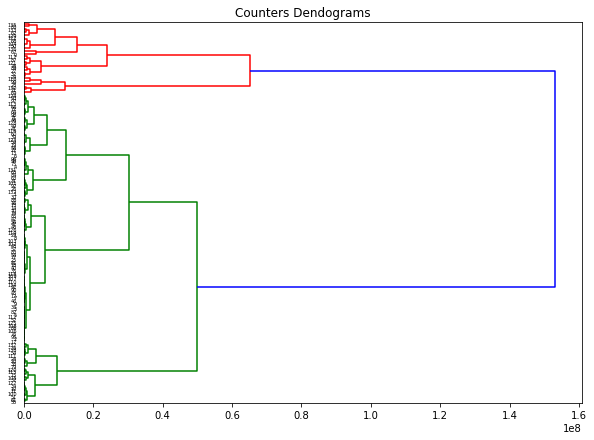

In [39]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_copy , method=linkage,metric=affinity),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

In [40]:
#training
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

clustering = AgglomerativeClustering().fit(df_copy)
clustering
clustering.labels_
#sklearn.metrics.silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds
silhouette_avg = silhouette_score(df_copy, clustering.labels_, metric='euclidean')
print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.7268512940660328


## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 